# SIMULACIÓN: LABORATORIO 1
### Entrega: martes 24 de agosto 2021, 23:59 horas


### CONTENIDOS
- Ejemplo del lanzamiento de monedas
- Conceptos: Espacio muestral, evento, probabilidad
- Principios de probabilidad y propiedades



### ¿Cómo asignamos valores de probabilidad?

- $\textbf{Enfoque frecuentista relativo o de simulación:}$ Sea $n$ el número de experimentos, y $n(A)$ el número de veces que el evento $A$ ocurre en la realización de esos experimentos, entonces $P(A) = \frac{n(A)}{n}$

- $\textbf{Enfoque frecuentista clásico:}$ Sea $n(A)$ el número elementos en el evento $A$, y $n(\Omega)$ el número de elementos en el espacio muestral $\Omega$, entonces $P(A) = \frac{n(A)}{n(\Omega)}$

- $\textbf{Enfoque Bayesiano:}$ Yo pienso que la probabilidad de que me gane un proyecto es $0.9$ (probabilidad a priori).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Lanzamiento de monedas

In [2]:
# Define algunos parámetros del contexto de trabajo
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')
# Crea dic variables de color que serán usadas en este contexto
rojo= sns.xkcd_rgb['vermillion']
azul= sns.xkcd_rgb['dark sky blue']


In [3]:
#utilzaremos la distribución binomial para modelar el experimento del lanzamiento de una moneda n veces
def factorial(n):
    """Calcula factorial de `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calcula la combinatoria de n y k 
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Retorna la probabilidad de que ocurran `k` caras in `n` lanzamientos de una moneda
    
    Argumentos:
    
    n - número de ensayos
    k - número de ensayos en los que se obtiene cara
    p - probabilidad de que el evento "obtener cara" ocurra
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

def lanzaMoneda(N_caras, N_exper): 
    # Calcula la probabilidad de cada posible salida (N_caras) 
    # del experimento de lanzar N_exper veces una moneda equilibrada
    probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
    #p_value es la probabilidad de que la salida sea mayor o igual que N_caras
    p_value = (np.sum(probabilidades[N_caras-1:]))
    print("P-value: {} %".format(p_value * 100))
    # Grafica la distribución de probabilidad calculada
    plt.step(range(1, N_exper + 1), probabilidades, where='mid', color=azul)
    plt.xlabel('número de caras')
    plt.ylabel('probabilidad')
    plt.plot((N_caras, N_caras), (0, max(probabilidades)), color=rojo)
    
    porc = round((p_value)*100,3)
    plt.annotate( str(porc) + '%', 
                 xytext=(N_caras + 10, max(probabilidades)/2), 
                 xy=(N_caras, max(probabilidades)/2), 
                 multialignment='right',
                 va='center',
                 color=rojo,
#                  size='large',
                 arrowprops={'arrowstyle': '<|-', 
                             'lw': 1, 
                             'color': rojo, 
                             'shrinkA': 1})
    plt.show()
                             
                             

P-value: 4.431304005703379 %


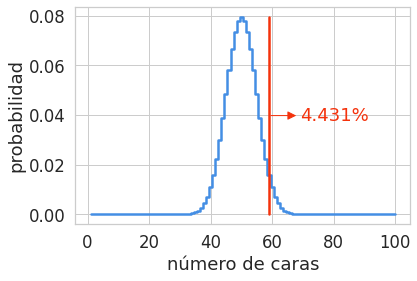

In [4]:
lanzaMoneda(59,100)


P-value simulado: 86.0%
P-value: 83.88818398212265 %


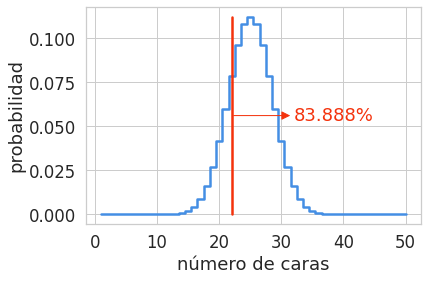

In [5]:
#Simularemos directamente el lanzamiento de la moneda considerando # valores aleatorios para el resultado de cada lanzamiento
M = 0
n = 200  # cambie este valor.
N_caras = 22
N_exper = 50
for i in range(n):
    #genera N_exper valores aleatorios 0 o 1
    ensayos = np.random.randint(2, size=N_exper)
    if (ensayos.sum() >= N_caras):
        M += 1
p = M / n

print("P-value simulado: %0.1f%%" % (p * 100))
lanzaMoneda(N_caras,N_exper)

### Pregunta 1
i) Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

ii) En el código de la simulación, considere valores crecientes de n ¿Desde qué cantidad la simulación reemplaza el análisis estadístico? Agregue código para graficar el comportamiento de convergencia de la simulación al valor obtenido utilizando la distribución binomial.

### i)  Utilice distintos valores para N_caras y N_exper ¿Qué es el valor "p" en ambos casos?

Probabilidad de obtener 30 caras en 70 lanzamientos: 4.68813594%
P-value: 90.58918984884863 %


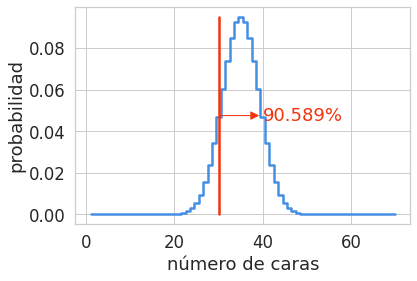

Probabilidad de obtener 10 caras en 25 lanzamientos: 9.74166393%
P-value: 88.5238528251648 %


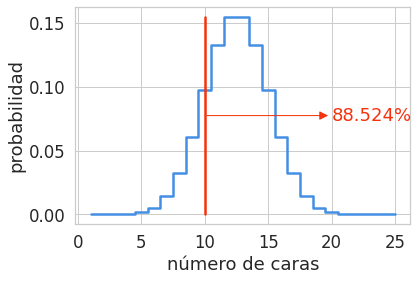

Probabilidad de obtener 50 caras en 300 lanzamientos: 0.00000000%
P-value: 4.007437608269459e-07 %


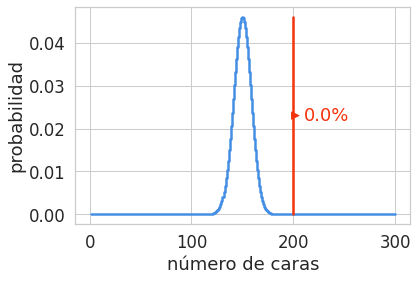

Probabilidad de obtener 100 caras en 130 lanzamientos: 0.00000002%
P-value: 2.710584013268921e-08 %


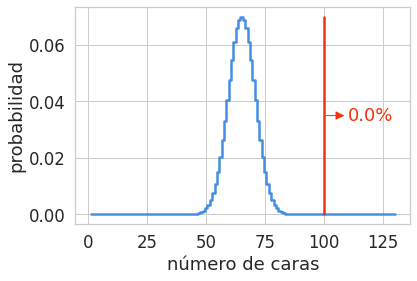

Probabilidad de obtener 300 caras en 500 lanzamientos: 0.00015443%
P-value: 0.00044700332711266336 %


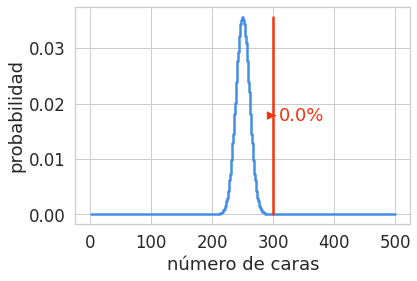

In [6]:
#30 caras en 70 lanzamientos 

print("Probabilidad de obtener 30 caras en 70 lanzamientos: %0.8f%%" % (binom_prob(70, 30, 0.5) * 100))
lanzaMoneda(30, 70)

#10 caras en 25 lanzamientos 
print("Probabilidad de obtener 10 caras en 25 lanzamientos: %0.8f%%" % (binom_prob(25,10, 0.5) * 100))
lanzaMoneda(10, 25)

#50 caras en 300 lanzamientos 
print("Probabilidad de obtener 50 caras en 300 lanzamientos: %0.8f%%" % (binom_prob(300, 50, 0.5) * 100))
lanzaMoneda(200, 300)

#100 caras en 130 lanzamientos 
print("Probabilidad de obtener 100 caras en 130 lanzamientos: %0.8f%%" % (binom_prob(130, 100, 0.5) * 100))
lanzaMoneda(100, 130)

#300 caras en 1500 lanzamientos
print("Probabilidad de obtener 300 caras en 500 lanzamientos: %0.8f%%" % (binom_prob(500, 300, 0.5) * 100))
lanzaMoneda(300, 500)




El valor p verifica la validez de nuestra hipotesis nula. Para hacer uso de esto se determina un límite superior para nuestro valor p, con el que por debajo de ese límite, podamos decir que nuestra hipótesis nula es falsa con (1-límite) % de confianza.   

### ii)

P-value obtenido de distribución binomial: 0.8389
los valores han convergido con 1850 simulaciones


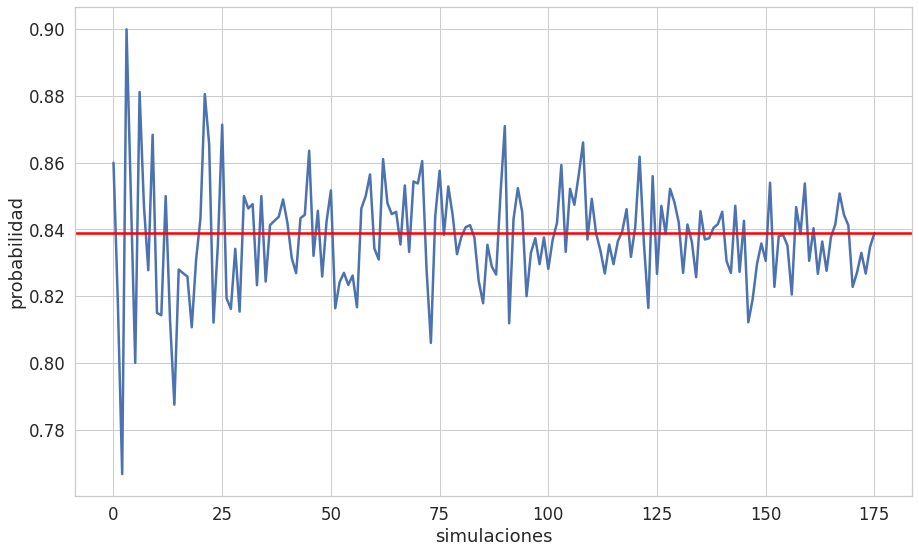

In [7]:
Ncaras = 22
Nexper = 50
Nsim = 100
lim = 10000
arr_pvalues = []

probabilidades = [binom_prob(N_exper, k, 0.5) for k in range(1, N_exper + 1)]
p_value_binom = round(np.sum(probabilidades[N_caras-1:]), 4)
print("P-value obtenido de distribución binomial: {}".format(p_value_binom))

def simulacion(Nsim, Ncaras, Nexper):
    M = 0
    for i in range(Nsim):
        ensayos = np.random.randint(2, size=N_exper)
        if (ensayos.sum() >= N_caras):
            M += 1
            
    p_value = M / Nsim
    return p_value

while Nsim <= lim:
    p_value = round(simulacion(Nsim, Ncaras, Nexper), 4)
    arr_pvalues.append(p_value)
    
    if p_value == p_value_binom: 
        print("los valores han convergido con {} simulaciones".format(Nsim))
        break
    Nsim += 10

plt.figure(figsize=(15, 9))
plt.xlabel('simulaciones')
plt.ylabel('probabilidad')
plt.plot(arr_pvalues)
plt.axhline(y=p_value_binom, color='r', linestyle='-')
plt.show()
#print("Valores p: {}".format(arr_pvalues))


#print("P-value simulado: %0.1f%%" % (p_value * 100))

#lanzaMoneda(Ncaras,Nexper)

### Pregunta 2 
En un certamen literario hay 3 premios: ganador, finalista y mención honrosa. Cada participante sólo puede obtener un premio. Si participan 12 personas en el certamen, se puede definir, el espacio muestral de los posibles resultados como:

${S = \{ \text{todas las formas de ordenar } (1,2,3,4,5,6,7,8,9,10,11,12) \}}$

En donde los números identifican a cada una de las 12 personas y  las primeras tres ubicaciones corresponden a los escritores premiados.

Sea ${A}$ el evento en que la persona #1 es ganador, el evento ${B}$ denota que la persona #2 no gana ningún premio, y el evento ${C}$ es que la persona #3 gana la mención honrosa.

Simule las probabilidades de los siguientes eventos y compare con los valores teóricos:  

(i) $A \cup B$ 

(ii) $A \cap B$

(iii) $A \cap B \cap C$

(iv) $A \cup (B\cap C)$


puede usar random.shuffle de la biblioteca random para generar permutaciones aleatorias de [1,2,...,12] 

### Pregunta 3

(i)  Demuestre (b) y (c) en la propiedad de Independencia.

(ii) Demuestre el Teorema de las Probabiliades totales.


# Referencias
1. https://github.com/croach/statistics-for-hackers/blob/master/statistics-for-hackers.ipynb
2. Ross, S. M. (2006). Simulation. Elsevier.